<a href="https://colab.research.google.com/github/EduardoShoiti/study_Classification_Validation_Metrics/blob/master/Notebooks/Hora_da_pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('diabetes.csv')
df

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [5]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
dtc =  DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

print(f"Acurácia DTC: {dtc.score(X_test, y_test)}")

Acurácia DTC: 0.5949367088607594


In [10]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)

print(f"Acurácia RFC: {rfc.score(X_test, y_test)}")

Acurácia RFC: 0.7088607594936709


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
y_pred_dtc = dtc.predict(X_test)
matriz_conusion_dtc = confusion_matrix(y_test, y_pred_dtc)
matriz_conusion_dtc

array([[33, 21],
       [11, 14]])

In [13]:
y_pred_rfc = rfc.predict(X_test)
matriz_conusion_rfc = confusion_matrix(y_test, y_pred_rfc)
matriz_conusion_rfc

array([[49,  5],
       [18,  7]])

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

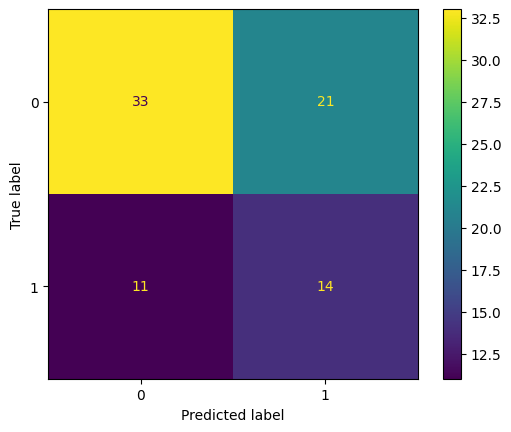

In [15]:
vizu_dtc = ConfusionMatrixDisplay(confusion_matrix=matriz_conusion_dtc, display_labels=dtc.classes_)
vizu_dtc.plot()

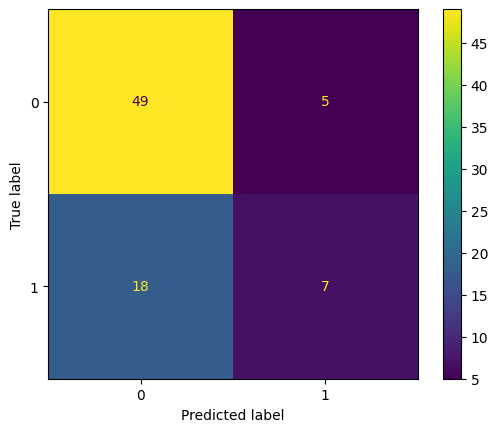

In [16]:
vizu_rfc = ConfusionMatrixDisplay(confusion_matrix=matriz_conusion_rfc, display_labels=rfc.classes_)
vizu_rfc.plot()

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [17]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [18]:
acuracia_dtc = accuracy_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc)
f1_dtc =  f1_score(y_test, y_pred_dtc)

print(f"Acurácia DTC: {acuracia_dtc}")
print(f"Recall DTC: {recall_dtc}")
print(f"Precision DTC: {precision_dtc}")
print(f"F1 DTC: {f1_dtc}")

Acurácia DTC: 0.5949367088607594
Recall DTC: 0.56
Precision DTC: 0.4
F1 DTC: 0.4666666666666667


In [19]:
acuracia_rfc = accuracy_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
f1_rfc =  f1_score(y_test, y_pred_rfc)

print(f"Acurácia RFC: {acuracia_rfc}")
print(f"Recall RFC: {recall_rfc}")
print(f"Precision RFC: {precision_rfc}")
print(f"F1 RFC: {f1_rfc}")

Acurácia RFC: 0.7088607594936709
Recall RFC: 0.28
Precision RFC: 0.5833333333333334
F1 RFC: 0.3783783783783784


### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

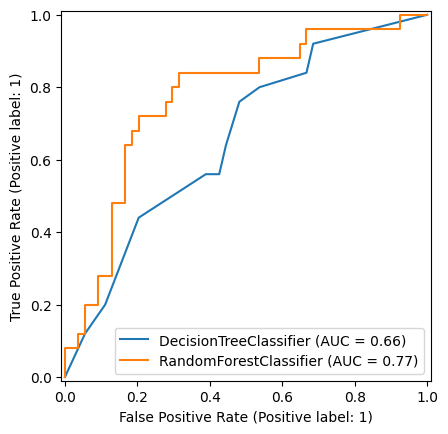

In [21]:
dtc_disp = RocCurveDisplay.from_estimator(dtc, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax = dtc_disp.ax_)

plt.show()

### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [22]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

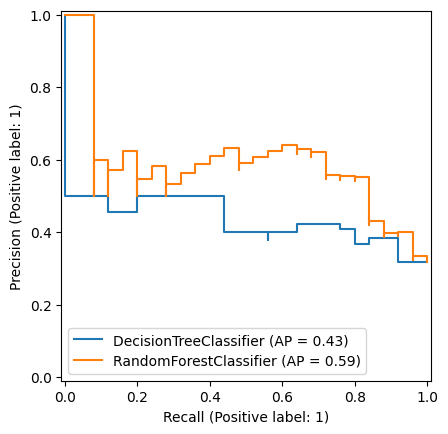

In [23]:
dtc_disp_pr = PrecisionRecallDisplay.from_estimator(dtc, X_test, y_test)
rfc_disp_pr = PrecisionRecallDisplay.from_estimator(rfc, X_test, y_test, ax=dtc_disp_pr.ax_)

plt.show()

### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [24]:
from sklearn.metrics import classification_report

# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [25]:
def intervalo_confianca(lista_resultados):
  media = lista_resultados.mean()
  desvio_padrao = lista_resultados.std()
  print(f"Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]")

### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [26]:
from sklearn.model_selection import KFold, cross_validate

In [27]:
kf_dtc = KFold(n_splits=5, shuffle=True, random_state=5)
lista_resultados_dtc = cross_validate(dtc, X, y, cv=kf_dtc)
lista_resultados_dtc

{'fit_time': array([0.00414824, 0.0033927 , 0.00332832, 0.00323749, 0.00319767]),
 'score_time': array([0.00208473, 0.00202823, 0.00195718, 0.00195098, 0.00201106]),
 'test_score': array([0.70886076, 0.73417722, 0.63291139, 0.67088608, 0.67948718])}

In [28]:
intervalo_confianca(lista_resultados_dtc['test_score'])

Intervalo de confiança: [0.6163866525595649, 0.754142396450497]


In [29]:
kf_rfc = KFold(n_splits=5, shuffle=True, random_state=5)
lista_resultados_rfc = cross_validate(rfc, X, y, cv=kf_rfc)
lista_resultados_rfc

{'fit_time': array([0.18448234, 0.22302365, 0.20583296, 0.17499828, 0.18029308]),
 'score_time': array([0.01166868, 0.01345682, 0.01014066, 0.00981092, 0.01147652]),
 'test_score': array([0.73417722, 0.69620253, 0.73417722, 0.63291139, 0.70512821])}

In [30]:
intervalo_confianca(lista_resultados_rfc['test_score'])

Intervalo de confiança: [0.6263496891556112, 0.7746889346678228]


### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [31]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [32]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
lista_resultados_dtc = cross_val_score(dtc, X, y, cv=skf, scoring='f1')
intervalo_confianca(lista_resultados_dtc)

Intervalo de confiança: [0.35643259219551415, 0.715585370777568]


In [33]:
lista_resultados_rfc = cross_val_score(rfc, X, y, cv=skf, scoring='f1')
intervalo_confianca(lista_resultados_rfc)

Intervalo de confiança: [0.48586221671706276, 0.6226967315810163]


### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [34]:
from sklearn.model_selection import LeaveOneOut

In [35]:
loo = LeaveOneOut()
lista_resultados_dtc = cross_val_score(dtc, X, y, cv=loo)
lista_resultados_dtc.mean()

0.6725888324873096

In [36]:
lista_resultados_rfc = cross_val_score(rfc, X, y, cv=loo)
lista_resultados_rfc.mean()

0.7055837563451777

# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

In [37]:
df['diabetes'].value_counts(normalize=True)

,proportion
diabetes,
0,0.670051
1,0.329949


### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [41]:
pipeline_dtc = Pipeline([
    ('smote', SMOTE(random_state=5)),
    ('dtc', dtc)
])

In [46]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
lista_resultados_dtc = cross_val_score(pipeline_dtc, X, y, cv=skf, scoring='f1')
intervalo_confianca(lista_resultados_dtc)

Intervalo de confiança: [0.44094392927522236, 0.6202270946899192]


In [47]:
pipeline_rfc = Pipeline([
    ('smote', SMOTE(random_state=5)),
    ('rfc', rfc)
])

In [48]:
lista_resultados_rfc = cross_val_score(pipeline_rfc, X, y, cv=skf, scoring='f1')
intervalo_confianca(lista_resultados_rfc)

Intervalo de confiança: [0.4884032586983778, 0.7000072338083327]


### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [49]:
from imblearn.under_sampling import NearMiss

In [50]:
pipeline_dtc = Pipeline([
    ('undersample', NearMiss(version=3)),
    ('dtc', dtc)
])

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
lista_resultados_dtc = cross_val_score(pipeline_dtc, X, y, cv=skf, scoring='f1')

In [51]:
intervalo_confianca(lista_resultados_dtc)

Intervalo de confiança: [0.4417898488025321, 0.6359073191792658]


In [54]:
pipeline_rfc = Pipeline([
    ('undersample', NearMiss(version=3)),
    ('rfc', rfc)
])

lista_resultados_rfc = cross_val_score(pipeline_rfc, X, y, cv=skf, scoring='f1')

In [55]:
intervalo_confianca(lista_resultados_rfc)

Intervalo de confiança: [0.4316679210731885, 0.7819178462533364]


### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

In [56]:
under_sampling = NearMiss(version=3)
X_under, y_under = under_sampling.fit_resample(X, y)

rfc.fit(X_under, y_under)
y_previsto = rfc.predict(X_test)

In [57]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        54
           1       0.71      0.96      0.81        25

    accuracy                           0.86        79
   macro avg       0.84      0.89      0.85        79
weighted avg       0.89      0.86      0.87        79



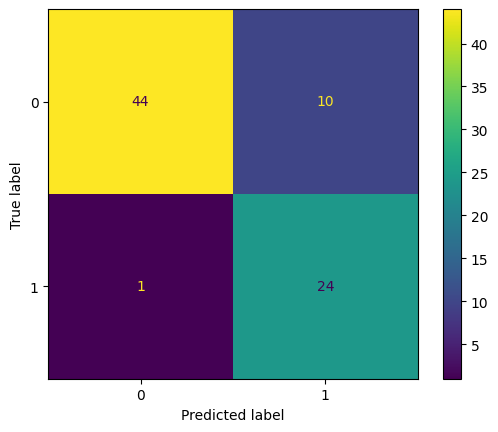

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto)